In [249]:
import pandas as pd
import numpy as np

## Acquire Data

In [250]:
#!pip install kagglehub

In [251]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [252]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("CooperUnion/cardataset")

#print("Path to dataset files:", path)

In [253]:
df = pd.read_csv(data)

In [254]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Data Prep

In [255]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [256]:
# clean up the header

In [257]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [258]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [259]:
# clean up the value in the same way 

In [260]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [261]:
for c in strings: 
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [262]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [263]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [264]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [265]:
for col in df.columns: 
    print(col) 
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [266]:
# distribution of price 

In [267]:
# pip install matplotlib

In [268]:
#pip install seaborn

In [269]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

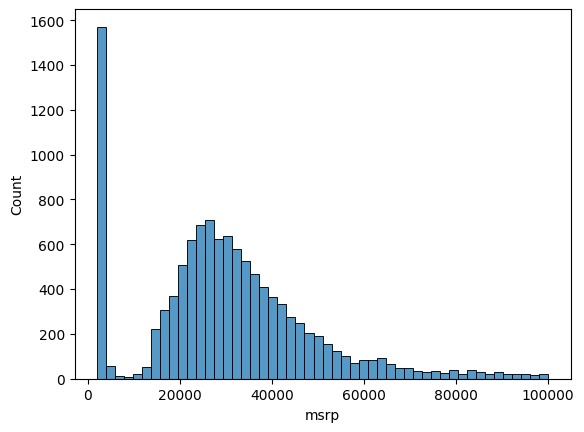

In [270]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

In [271]:
# get rid of the long tail 

In [272]:
#log1p is taking the log of all value +1 , to avoid 0 
price_log = np.log1p(df.msrp)

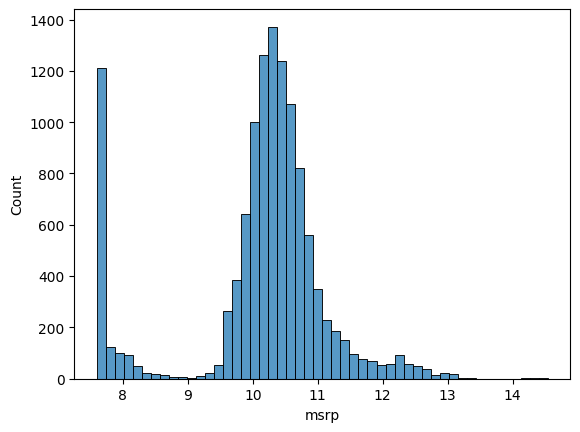

In [273]:
sns.histplot(price_log, bins=50)
plt.show()
#looks like a normal distribution, bell shaped 

In [274]:
# missing value

In [275]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Set up Validation and Testing set 

In [276]:
n = len(df) # total amount 
n_val  = int(n * 0.2)
n_test  = int(n * 0.2)
n_train  = n - n_val - n_test

In [277]:
n, n_test, n_val, n_train

(11914, 2382, 2382, 7150)

In [278]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_test + n_val :]

In [279]:
idx = np.arange(n)

In [280]:
np.random.shuffle(idx)

In [281]:
idx

array([1539,  748, 4287, ..., 1460, 3698, 6780])

In [282]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_test]]
df_val = df.iloc[idx[n_train+n_test:]]


In [283]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1539,cadillac,ats,2015,premium_unleaded_(recommended),272.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",compact,sedan,30,21,1624,35245
748,volvo,740,1991,regular_unleaded,162.0,4.0,manual,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,24,18,870,2000
4287,hyundai,excel,1993,regular_unleaded,81.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,33,25,1439,2000
6954,pontiac,montana,2004,regular_unleaded,185.0,6.0,automatic,front_wheel_drive,4.0,NaN,compact,passenger_minivan,24,17,210,23335
7312,kia,optima_hybrid,2016,regular_unleaded,199.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,40,36,1720,25995


In [284]:
len(df_train), len(df_val), len(df_test)


(7150, 2382, 2382)

In [285]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [286]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [287]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [288]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,ats,2015,premium_unleaded_(recommended),272.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",compact,sedan,30,21,1624
1,volvo,740,1991,regular_unleaded,162.0,4.0,manual,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,24,18,870
2,hyundai,excel,1993,regular_unleaded,81.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,33,25,1439
3,pontiac,montana,2004,regular_unleaded,185.0,6.0,automatic,front_wheel_drive,4.0,NaN,compact,passenger_minivan,24,17,210
4,kia,optima_hybrid,2016,regular_unleaded,199.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,40,36,1720


## Linear Regression

In [289]:
df_train.iloc[10]

make                                     ford
model                                   f-150
year                                     2016
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               385.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                four_wheel_drive
number_of_doors                           4.0
market_category                     flex_fuel
vehicle_size                            large
vehicle_style                 crew_cab_pickup
highway_mpg                                21
city_mpg                                   15
popularity                               5657
Name: 10, dtype: object

In [290]:
y_train[10]

10.655516660832296

In [291]:
xi = [240,17,870] #taking hp, mpg, popularity
w0 = 7.60
w = [1,1,1]


In [292]:
def linear_regression(xi): 
    n = len(xi)
    pred = w0 
    
    for j in range(n): 
        pred = pred + xi[j] * w[j]
    return pred 
    

In [293]:
linear_regression(xi)

1134.6

In [294]:
xi = [240,17,870]
w0 = 7
w = [0.001,0.001,0.001]

In [295]:
linear_regression(xi)

8.127

In [296]:
np.exp(8.127)-1

3383.6304277788245

In [297]:
np.expm1(8.127)

3383.6304277788245

## Linear regression vector form

In [298]:
def dot(xi, w): 
    n = len(xi) 

    prod = 0 
    for j in range(n):
        prod = prod + xi[j] * w[j]

    return prod 
    

In [299]:
def linear_regression(xi): 
    
    pred = w0 + dot(xi,w)

    return pred 

In [300]:
w_new = [w0] + w
w_new

[7, 0.001, 0.001, 0.001]

In [301]:
xi_new = [1] + xi
xi_new

[1, 240, 17, 870]

In [302]:
def linear_regression(xi): 
    return dot(xi,w_new)

In [303]:
linear_regression(xi_new)

8.127

In [304]:
df_train[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,ats,2015,premium_unleaded_(recommended),272.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",compact,sedan,30,21,1624
1,volvo,740,1991,regular_unleaded,162.0,4.0,manual,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,24,18,870
2,hyundai,excel,1993,regular_unleaded,81.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,33,25,1439
3,pontiac,montana,2004,regular_unleaded,185.0,6.0,automatic,front_wheel_drive,4.0,NaN,compact,passenger_minivan,24,17,210
4,kia,optima_hybrid,2016,regular_unleaded,199.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,40,36,1720


In [305]:
x1 = [1, 543, 10, 67]
x2 = [1, 166, 24, 19]
x3 = [1, 128, 33, 27]
X = [x1,x2,x3]
X = np.array(X)
X

array([[  1, 543,  10,  67],
       [  1, 166,  24,  19],
       [  1, 128,  33,  27]])

In [306]:
X.dot(w_new)

array([7.62 , 7.209, 7.188])

In [307]:
def linear_regression(X): 
    
    return X.dot(w_new)

## Training a Linear Regression Model

In [308]:
# solve the martrix
# w = inv(Xt X) Xt y 

In [309]:
def train_linear_regression(X, y): 
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(XT).dot(y)
    
    return w[0], w[1:]
    

In [310]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [311]:
ones = np.ones(X.shape[0])
X = np.column_stack((ones, X))
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [312]:
XT = X.T
XT

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00],
       [1.480e+02, 1.320e+02, 4.530e+02, 1.580e+02, 1.720e+02, 4.130e+02,
        3.800e+01, 1.420e+02, 4.530e+02],
       [2.400e+01, 2.500e+01, 1.100e+01, 2.400e+01, 2.500e+01, 1.100e+01,
        5.400e+01, 2.500e+01, 3.100e+01],
       [1.385e+03, 2.031e+03, 8.600e+01, 1.850e+02, 2.010e+02, 8.600e+01,
        1.850e+02, 4.310e+02, 8.600e+01]])

In [313]:
XTX = XT.dot(X)

In [314]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [315]:
w = XTX_inv.dot(XT).dot(y)
w

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [317]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [318]:
train_linear_regression(X,y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

## Car price baseline model

In [320]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [321]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [355]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
X_train = df_train[base]

In [323]:
X_train.isnull().sum()

engine_hp           48
engine_cylinders    18
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [324]:
X_train = X_train.fillna(0)

In [325]:
X_train.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [327]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.909361629037852,
 array([ 9.45693601e-03, -1.45702391e-01,  1.62230773e-02,  1.37383765e-02,
        -1.60118623e-05]))

In [328]:
y_pred = w0 + X_train.dot(w)
y_pred

0       10.648034
1        9.481290
2        8.948344
3        9.404224
4       10.324447
          ...    
7145     9.263827
7146    11.246760
7147    11.339100
7148     9.420104
7149     9.895275
Length: 7150, dtype: float64

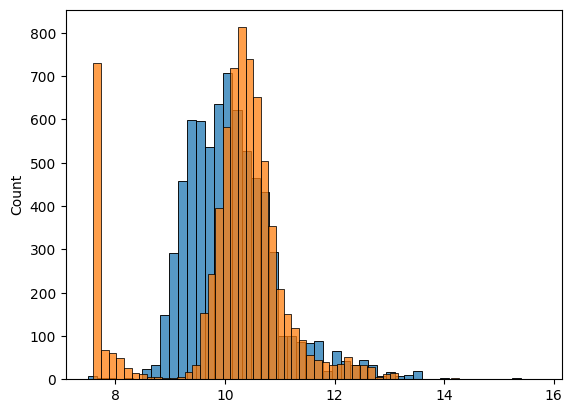

In [330]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_train, bins=50)
plt.show()

## RMSE

In [337]:
def rmse(y, y_pred): 
    se = (y - y_pred) **2 
    mse = se.mean()
    rmse = np.sqrt(mse)
    
    return rmse

In [338]:
rmse(y_train, y_pred)

0.7510714371105164

In [341]:
type((y_train - y_pred) **2 )

pandas.core.series.Series

## Validating the model

In [343]:
def prepare_X(df): 
    df_num = df[base]
    df_num= df_num.fillna(0)
    

    return df_num

In [344]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred) 

0.7537821600711583

## Simple feature engineering

In [346]:
df_train.columns
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [358]:
def prepare_X(df): 
    df['age'] = 2017 - df['year']
    features = base + ['age']
    df_num = df[features]
    df_num= df_num.fillna(0)
    

    return df_num

In [359]:
X_train = prepare_X(df_train)
X_train

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age
0,272.0,4.0,30,21,1624,2
1,162.0,4.0,24,18,870,26
2,81.0,4.0,33,25,1439,24
3,185.0,6.0,24,17,210,13
4,199.0,4.0,40,36,1720,1
...,...,...,...,...,...,...
7145,190.0,6.0,17,12,549,14
7146,0.0,0.0,101,126,2009,1
7147,430.0,8.0,21,14,259,2
7148,201.0,6.0,18,15,873,16


In [360]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)


In [362]:
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

0.5320521275846272

<Axes: ylabel='Count'>

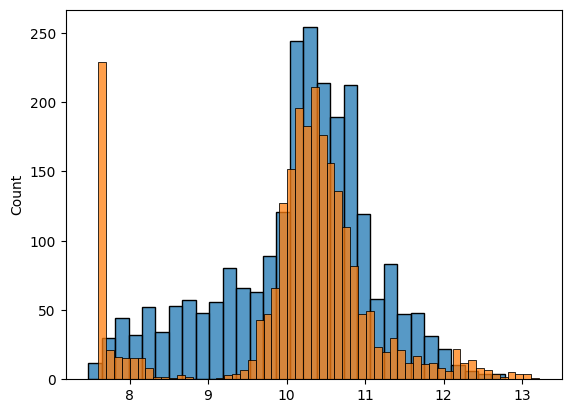

In [365]:
sns.histplot(y_val_pred)
sns.histplot(y_val)


## Categorical variables

## Regularization

## Using the model